In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import gzip, os
import numpy as np
from scipy.stats import multivariate_normal

from urllib.request import urlretrieve

In [7]:
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)
    
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [8]:
# load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [9]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [10]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

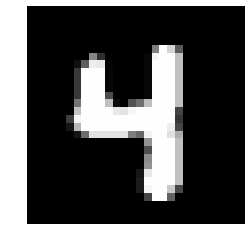

In [11]:
displaychar(train_data[58])

In [21]:
# split the training set into 2 sets: train_1 and valid sets
train_sub_size = int(0.8 * len(train_labels))
np.random.seed(0)
perm = np.random.permutation(len(train_labels))
sub_train_data = train_data[perm[0:train_sub_size],:]
sub_train_label = train_labels[perm[0:train_sub_size]]
valid_data = train_data[perm[train_sub_size:],:]
valid_label = train_data[perm[train_sub_size:]]

In [22]:
def fit_generative_model(x, y):
    k = 10
    d = (x.shape)[1]
    mu = np.zeros((k, d))
    sigma = np.zeros((k, d,d ))
    pi = np.zeros(k)
    
    # calculate mu, sigma, pi
    for label in range(k):
        indices = (y==label)
        mu[label] = np.mean(x[indices,:], axis=0)
        sigma[label] = np.cov(x[indices,:], rowvar=0, bias=1)
        pi[label] = float(sum(y==label))/float(len(y))
        
    # with these sets, choose the best c
    ## my code to select a good c
    # 1. init c, set up a multivariate guassian for the subset, test the validation set,
    # 2. choose the c which has the lowest error among the validation set
    return mu, sigma, pi